# Perceptron

## Lab Assignment - Vehicle Mileage Prediction

Classify vehicle mileage as high or low based on two features, weight and horsepower using Perceptron model.

Perform classification with the following functions.

#### 1. Plot the scatter of weight vs horsepower. The vehicles with high mileage should be in blue color and low should be in red color. Give appropriate legends. 
#### 2. Split the data set into training and testing data set. Use the train_test_split function to get a 80:20 split, using random_state 3. Plot a bar chart of number of 1's and 0's in the training dataset. 
#### 4. Use the perceptron model to classify the data, and get predictions for test dataset.
#### 5. Obtain the confusion matrix of the output.
#### 6. Plot the separating hyperplane on the training dataset.
#### 7. Get the classification result for the values of weight 2, 3.3, 1.21, 5.32, 1.23, 4.8 and horsepower 20, 29, 13, 100, 40, 49 respectively. 

### Split the dataset with 80:20 ratio, but with random_state 299. Get the output of steps 3, 4, 5, 6. What is the difference from the previous output?

### Perform KFold cross validation for k=3 to 6 for this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from io import StringIO
dataset =StringIO('''
weight,horsepower,mileage
1.4,43,1
1.5,8,0
2.71,44,1
3.55,23,0
2.5,15,0
2.9,19,0
3.85,112,1
3.96,87,1
4.62,108,1
4.7,21,0
2.67,34,1
2.5,20,0
1.932,12, 0
4.8,48,1
1.321,32,1
1.9013,52,1
4.13,19,0
2.8,29,0
''')
df = pd.read_csv(dataset)
df.head()

,weight,horsepower,mileage
0,1.40,43,1
1,1.50,8,0
2,2.71,44,1
3,3.55,23,0
4,2.50,15,0


### 1. Plot the scatter of weight vs horsepower. The vehicles with high mileage should be in blue color and low                  should be in red color. Give appropriate legends. 

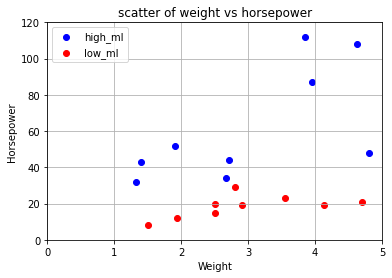

In [77]:
high_ml=df[df['mileage']==1]
low_ml=df[df['mileage']==0]

plt.scatter(high_ml['weight'],high_ml['horsepower'],label='high_ml',color='b')
plt.scatter(low_ml['weight'],low_ml['horsepower'],label='low_ml',color='r')
plt.title('scatter of weight vs horsepower')
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.legend()
plt.axis([0,5,0,120])
plt.grid(True)

### 2. Split the data set into training and testing data set. Use the train_test_split function to get a 80:20 split,                                                 using random_state 3

In [19]:
from sklearn.model_selection import train_test_split

wt_train,wt_test,hp_train,hp_test= train_test_split(df[['weight','horsepower']],df['mileage'],random_state=3,test_size=0.2)#train test train test


###  3. Plot a bar chart of number of 1's and 0's in the training dataset.

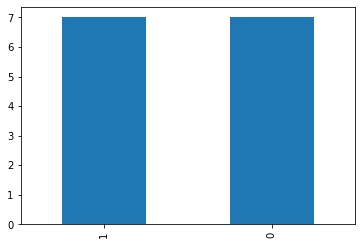

In [20]:
hp_train.value_counts().plot(kind='bar')

### 4.Use the perceptron model to classify the data, and get predictions for test dataset.

In [21]:
from sklearn.linear_model import Perceptron
classifier = Perceptron(max_iter=1000,tol=0.1)
model = classifier.fit(wt_train,hp_train)

In [22]:
model.predict(wt_train)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'сmap'


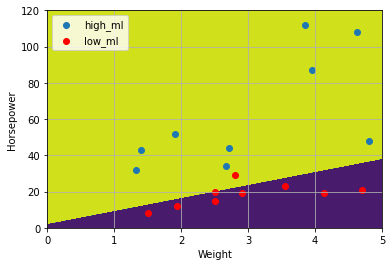

In [23]:
%matplotlib inline 
import numpy as np

x_min, x_max=0,5 
y_min ,y_max=0,120     

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange (y_min, y_max, 0.01))

# print(xx); print(yy) 
xx_lin = xx.ravel() #print(xx_lin); 
yy_lin =yy.ravel(); #printyy lin); 
pred_input= np.c_[xx_lin, yy_lin]; #print(pred_input)

Z=model.predict(pred_input); #print(Z); 
Z=Z.reshape(xx.shape) #print(Z);
#Contour plot requires 2 dimensional matrix 
plt.contourf(xx, yy, Z, сmap=plt.cm.Pastel1)

plt.scatter(high_ml['weight'], high_ml['horsepower'],label='high_ml') 
plt.scatter(low_ml['weight'], low_ml['horsepower'],label='low_ml',color='r') 
plt.xlabel("Weight") 
plt.ylabel("Horsepower") 
plt.legend() 
plt.axis([0,5,0,120]) 
plt.grid()

### 5. Obtain the confusion matrix of the output.

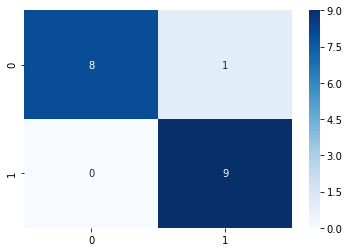

In [69]:
import seaborn
from sklearn.metrics import confusion_matrix


w=df['weight'].tolist()
h=df['horsepower'].tolist()
pred_input= np.c_[w,h] 

predicted=model.predict(pred_input)
seaborn.heatmap(confusion_matrix(df['mileage'],predicted),annot=True,cmap="Blues")

### 7. Get the classification result for the values of weight 2, 3.3, 1.21, 5.32, 1.23, 4.8 and horsepower 20, 29, 13, 100, 40, 49 respectively.

In [92]:
model.predict([[2,20],[3.3,29],[1.21,13],[5.32,100],[1.23,40],[4.8,49]])

array([1, 1, 1, 1, 1, 1], dtype=int64)

### 8. Split the dataset with 80:20 ratio, but with random_state 299. Get the output of steps 3, 4, 5, 6. What is the difference from the previous output?¶

In [85]:
from sklearn.model_selection import train_test_split

wt_train,wt_test,hp_train,hp_test= train_test_split(df[['weight','horsepower']],df['mileage'],random_state=299,test_size=0.2)#train test train test


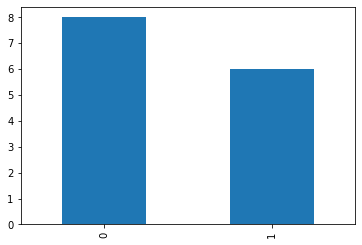

In [86]:
hp_train.value_counts().plot(kind='bar')

In [87]:
from sklearn.linear_model import Perceptron
classifier = Perceptron(max_iter=1000,tol=0.1)
model = classifier.fit(wt_train,hp_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'сmap'


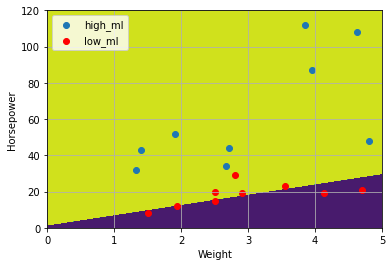

In [88]:
%matplotlib inline 
import numpy as np

x_min, x_max=0,5 
y_min ,y_max=0,120     

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange (y_min, y_max, 0.01))

# print(xx); print(yy) 
xx_lin = xx.ravel() #print(xx_lin); 
yy_lin =yy.ravel(); #printyy lin); 
pred_input= np.c_[xx_lin, yy_lin]; #print(pred_input)

Z=model.predict(pred_input); #print(Z); 
Z=Z.reshape(xx.shape) #print(Z);
#Contour plot requires 2 dimensional matrix 
plt.contourf(xx, yy, Z, сmap=plt.cm.Pastel1)

plt.scatter(high_ml['weight'], high_ml['horsepower'],label='high_ml') 
plt.scatter(low_ml['weight'], low_ml['horsepower'],label='low_ml',color='r')

plt.xlabel("Weight") 
plt.ylabel("Horsepower") 
plt.legend() 
plt.axis([0,5,0,120]) 
plt.grid()

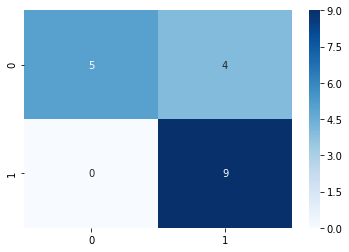

In [89]:
import seaborn
from sklearn.metrics import confusion_matrix


w=df['weight'].tolist()
h=df['horsepower'].tolist()
pred_input= np.c_[w,h] 

predicted=model.predict(pred_input)
seaborn.heatmap(confusion_matrix(df['mileage'],predicted),annot=True,cmap="Blues")


If we look at the confusion matrix for random state 299 we can see that it was not able to classify 4 low mileage cars correctly
for random state 3, only one low mileage car was not correctly classified